In [21]:
# 01_eda.ipynb

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple

# Configure visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

def load_data(filepath: str) -> pd.DataFrame:
    """
    Load the Telco Customer Churn dataset from a CSV file.

    Args:
        filepath (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded dataframe.
    """
    df = pd.read_csv(filepath)
    return df

def check_missing_values(df: pd.DataFrame) -> pd.Series:
    """
    Check for missing values in the dataframe.

    Args:
        df (pd.DataFrame): Input dataframe.

    Returns:
        pd.Series: Number of missing values per column.
    """
    missing = df.isnull().sum()
    return missing[missing > 0]

def data_overview(df: pd.DataFrame) -> None:
    """
    Print general information about the dataset.

    Args:
        df (pd.DataFrame): Input dataframe.
    """
    print("----- Dataset Overview -----")
    print(f"Shape: {df.shape}")
    print("\nData types:")
    print(df.dtypes)
    print("\nSample data:")
    print(df.head())
    print("\nSummary statistics:")
    print(df.describe(include='all'))

def plot_churn_distribution(df: pd.DataFrame) -> None:
    """
    Plot the distribution of churned vs non-churned customers.

    Args:
        df (pd.DataFrame): Input dataframe.
    """
    sns.countplot(x='Churn', data=df, palette='Set2')
    plt.title('Customer Churn Distribution')
    plt.xlabel('Churn')
    plt.ylabel('Number of Customers')
    plt.show()

def plot_numeric_feature_distribution(df: pd.DataFrame, feature: str, hue: str = 'Churn') -> None:
    """
    Plot distribution of a numeric feature grouped by churn.

    Args:
        df (pd.DataFrame): Input dataframe.
        feature (str): Numeric feature to plot.
        hue (str): Categorical column to group by (default 'Churn').
    """
    sns.histplot(data=df, x=feature, hue=hue, multiple='stack', kde=True)
    plt.title(f'Distribution of {feature} grouped by {hue}')
    plt.show()

def plot_categorical_feature_distribution(df: pd.DataFrame, feature: str, hue: str = 'Churn') -> None:
    """
    Plot distribution of a categorical feature grouped by churn.

    Args:
        df (pd.DataFrame): Input dataframe.
        feature (str): Categorical feature to plot.
        hue (str): Categorical column to group by (default 'Churn').
    """
    sns.countplot(x=feature, hue=hue, data=df, palette='Set1')
    plt.title(f'Distribution of {feature} grouped by {hue}')
    plt.xticks(rotation=45)
    plt.show()

# Main Execution
if __name__ == "__main__":
    data_path: str = "../data/raw/telco_customer_churn.csv"
    
    # Load data
    df: pd.DataFrame = load_data(data_path)
    
    # Initial overview
    data_overview(df)
    
    # Check for missing values
    missing_vals: pd.Series = check_missing_values(df)
    if missing_vals.empty:
        print("\nNo missing values detected.")
    else:
        print("\nMissing values:")
        print(missing_vals)
    
    # Plot churn distribution
    plot_churn_distribution(df)
    
    # Plot numeric features distribution
    numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
    for feature in numeric_features:
        # TotalCharges has missing spaces that might convert it to object, so fix it
        if feature == "TotalCharges" and df[feature].dtype == 'object':
            df[feature] = pd.to_numeric(df[feature], errors='coerce')
        plot_numeric_feature_distribution(df, feature)
    
    # Plot some categorical features
    categorical_features = ['Contract', 'PaymentMethod', 'InternetService']
    for feature in categorical_features:
        plot_categorical_feature_distribution(df, feature)


----- Dataset Overview -----
Shape: (7043, 21)

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Sample data:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7

/tmp/ipykernel_87783/3249333676.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


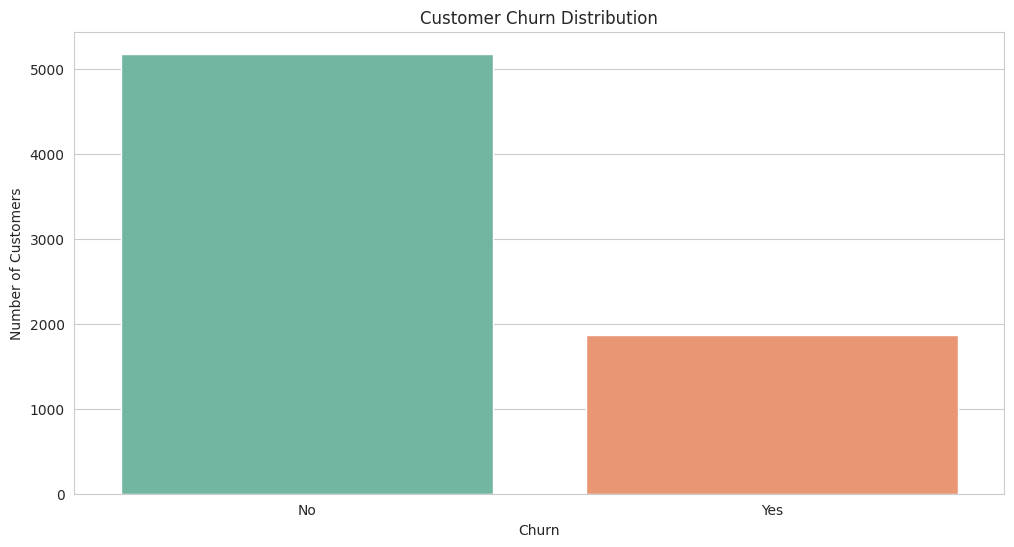

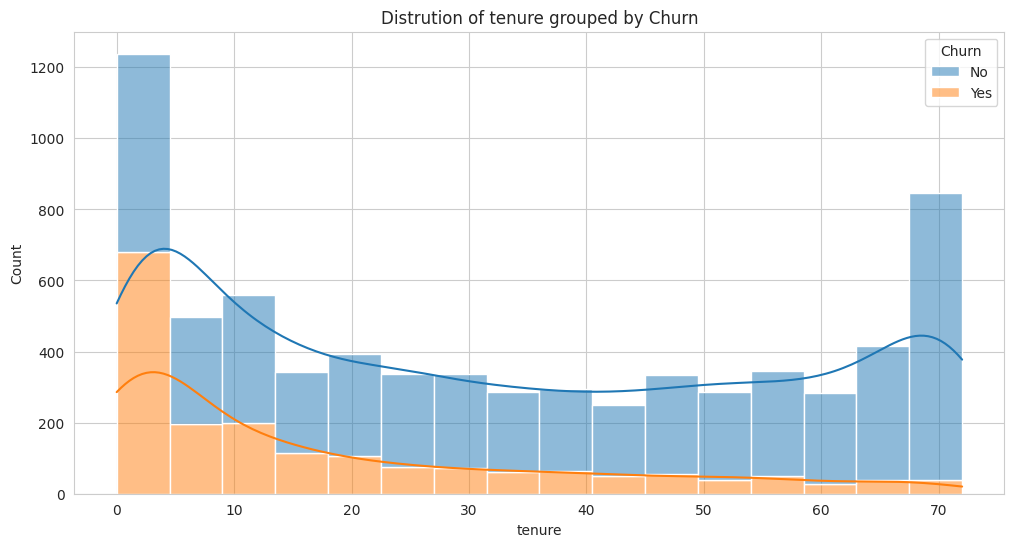

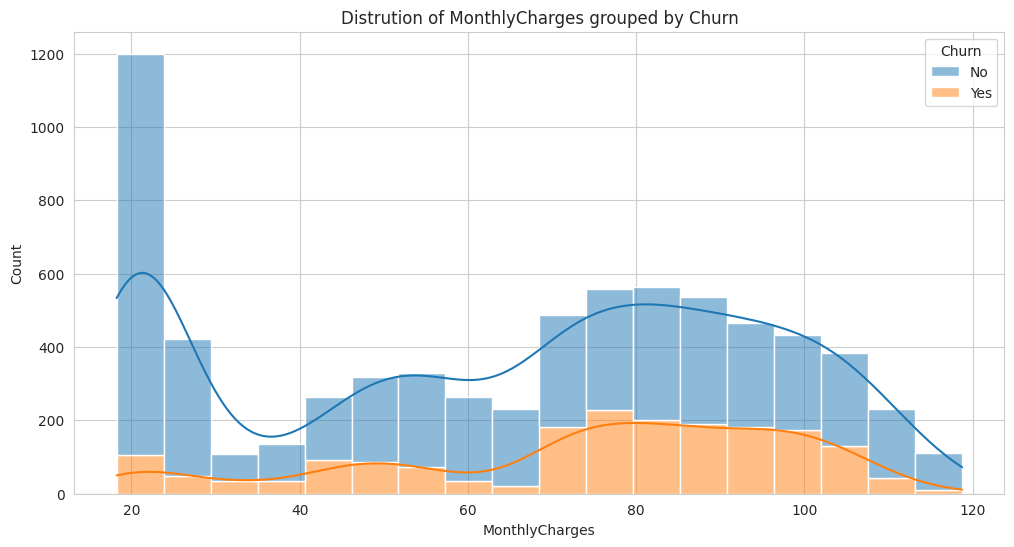

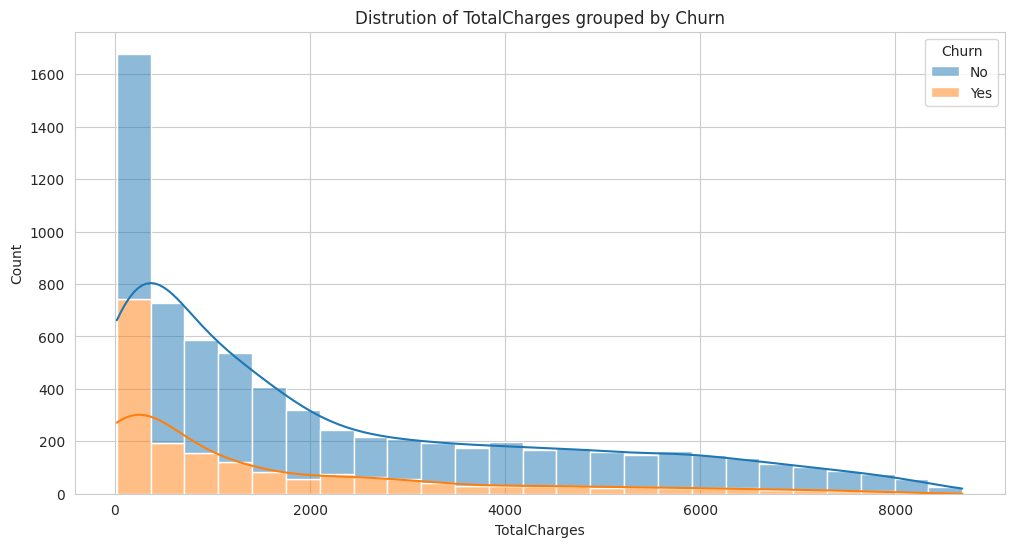

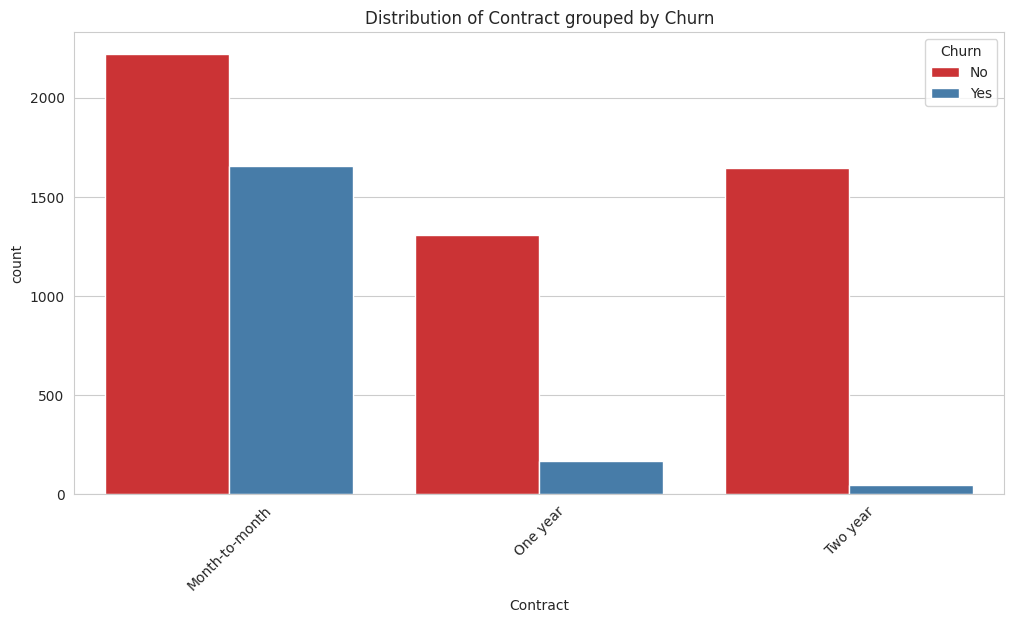

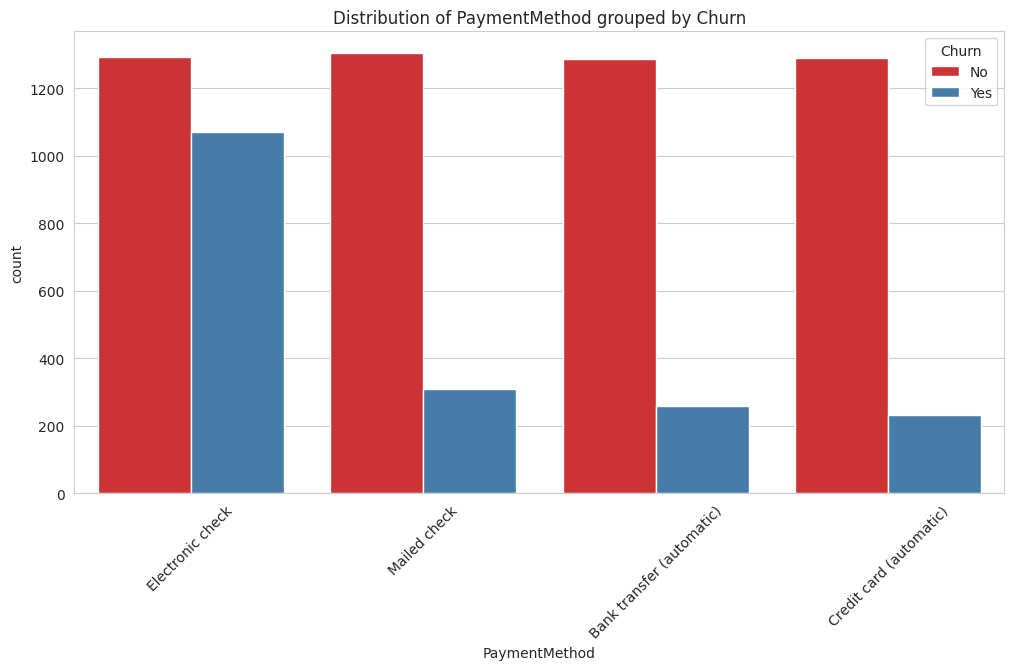

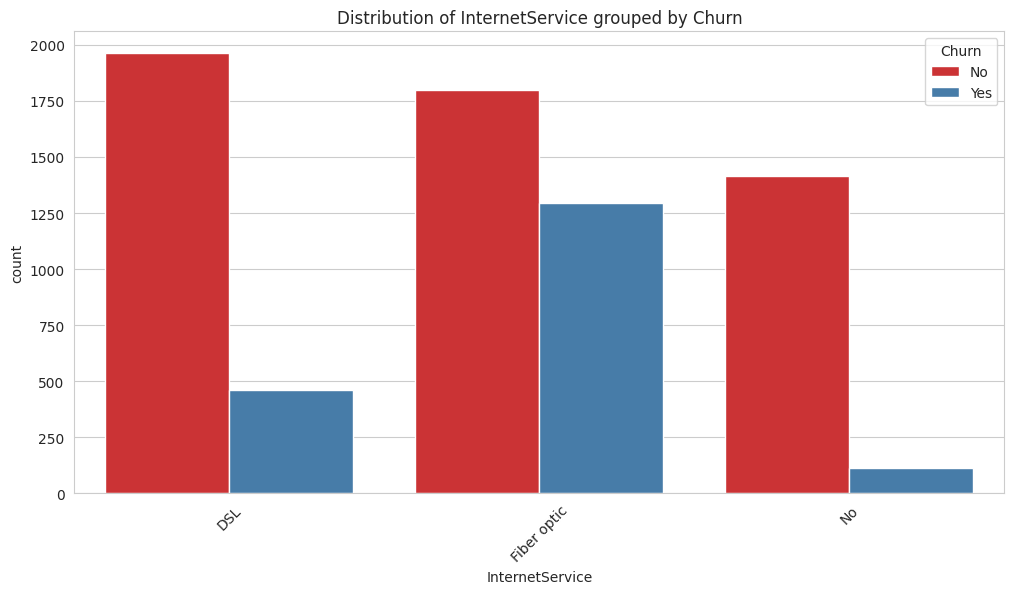

In [24]:
# Main Execution
if __name__ == "__main__":
    data_path: str = "../data/raw/Telco-Customer-Churn.csv"

    # Load data
    df: pd.DataFrame = load_data(data_path)

    # Initial overview
    data_overview(df)

    # Check for missing values
    missing_vals: pd.Series = check_missing_values(df)
    if missing_vals.empty:
        print("\nNo missing values detected.")
    else:
        print("\nMissing values:")
        print(missing_vals)

    # Plot churn distribution
    plot_churn_distribution(df)

    # Plot numeric features distribution
    numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
    for feature in numeric_features:
        # TotalCharges has missing spaces that might convert it to object, so fix it
        if feature == "TotalCharges" and df[feature].dtype == 'object':
            df[feature] = pd.to_numeric(df[feature], errors='coerce')
        plot_numeric_feature_distribution(df, feature)

    # Plot some categorical features
    categorical_features = ['Contract', 'PaymentMethod', 'InternetService']
    for feature in categorical_features:
        plot_categorical_feature_distribution(df, feature)
    